# Intro to Pandas
Pandas is a package used to work with tabular data. In this notebook we will some examples of the main functionalities. For a detailed account of what is possible with Pandas you can read the free online textbook [Python for Data Analysis, 3rd edition](https://wesmckinney.com/book/) by Wes McKinney.

In [1]:
import numpy as np
import pandas as pd
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.24.3
pandas version: 1.5.3


## Series
A Series is an indexed collection of objects. By default a Series index is based on integer numbers starting from 0 but we can use a different index, such as a set of chars or dates.

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'], index=['a', 'b', 'c'])
populations = pd.Series([852469, 1015785, 485199], index=['a', 'b', 'c'])

## DataFrame
DataFrame is the class that provides a powerful set of functions to use when working with tabular data. It is a data structure defined as a collection of columns with a common index. By default a DataFrame index is based on integer numbers, like for the Series object, starting from 0 but we can use a different index as well. If we use Series as columns the DataFrame index will be the same as that used in the Series objects. As an example we build a DataDrame from two Series objects

In [3]:
cities = pd.DataFrame({ 'city name': city_names, 'population': populations })

We can add two more columns, one with data and a second one with a definition of the data computed from two columns that already exist in the DataFrame:

In [4]:
cities['area'] = pd.Series([46.87, 176.53, 97.92], index=['a', 'b', 'c'])
cities['density'] = cities['population'] / cities['area']
cities

,city name,population,area,density
a,San Francisco,852469,46.87,18187.945381
b,San Jose,1015785,176.53,5754.177760
c,Sacramento,485199,97.92,4955.055147


We can perfom statistical computation using the same kind of functions that are also available for a NumPy array such as the mean value of one or more columns.

In [5]:
mean_area, mean_population = cities[['area', 'population']].mean()
print("Cities mean area: {0:.2f}\nCities mean population: {1:.0f}".format(mean_area, mean_population))

Cities mean area: 107.11
Cities mean population: 784484


We can select a column by its name

In [6]:
cities['city name']

a    San Francisco
b         San Jose
c       Sacramento
Name: city name, dtype: object

and a row by its index

In [7]:
cities.loc['b']

city name       San Jose
population       1015785
area              176.53
density       5754.17776
Name: b, dtype: object

or just one element by its column name and row index 

In [8]:
cities['city name']['b']

'San Jose'

or its row index and column name

In [9]:
cities.loc['b']['city name']

'San Jose'

or finally by the row index position, and the column index position 

In [10]:
cities.iloc[1][0]

'San Jose'

## Lambdas
We can apply anonimous functions to columns. For example we want to add a new column to our cities DataFrame that tells whether a city name starts with "San " and has an area larger than 50 $km^2$ 

In [11]:
names = cities['city name']
area = cities['area']
cities['Saint_50'] = names.apply(lambda name: name[:4] == "San ") & area.apply(lambda area: area > 50)
cities

,city name,population,area,density,Saint_50
a,San Francisco,852469,46.87,18187.945381,False
b,San Jose,1015785,176.53,5754.177760,True
c,Sacramento,485199,97.92,4955.055147,False


## List comprehension

In [12]:
def saint_50(city_name, area):
  is_saint = city_name[0:3] == "San"
  is_50 = area > 50
  return is_saint & is_50

# A solution using list comprehension and the zip() function  
cities["Saint_50_List_Compr1"] = [saint_50(city_name, area) for city_name, area in zip(cities['city name'], cities['area'])]
cities

,city name,population,area,density,Saint_50,Saint_50_List_Compr1
a,San Francisco,852469,46.87,18187.945381,False,False
b,San Jose,1015785,176.53,5754.177760,True,True
c,Sacramento,485199,97.92,4955.055147,False,False


In [13]:
# A 3rd solution using two list comprehension
saint = [name[0:3] == "San" for name in cities["city name"]]
area50 = [area > 50 for area in cities['area']]
cities["Saint_50_List_Compr2"] = pd.Series(saint) & pd.Series(area50)
cities

,city name,population,area,density,Saint_50,Saint_50_List_Compr1,Saint_50_List_Compr2
a,San Francisco,852469,46.87,18187.945381,False,False,NaN
b,San Jose,1015785,176.53,5754.177760,True,True,NaN
c,Sacramento,485199,97.92,4955.055147,False,False,NaN


## Data aggregation
We explore some aggregation functions available in Pandas. For our example we use the air pollutant releases dataset from the [European Environment Agency](https://www.eea.europa.eu/en). The dataset contains the emissions of several pollutants of EU countries from 2007 to 2021.

In [187]:
air_rel_df = pd.read_csv('iia/data/eea/EEA_Total_Releases_National_Level_into_Air.csv') 
air_rel_df.head()

,countryName,pollutant,reportingYear,emissions
0,Austria,Cadmium and compounds (as Cd),2007,15.3
1,Austria,Hydrogen cyanide (HCN),2008,2396.0
2,Austria,Polycyclic aromatic hydrocarbons (PAHs),2008,135.0
3,Austria,Chlorine and inorganic compounds (as HCl),2009,40900.0
4,Austria,Dichloromethane (DCM),2009,12000.0


In [189]:
num_pollutants = air_rel_df['pollutant'].nunique()
print('Number of distinct pollutant considered: {0:d}'.format(num_pollutants))

Number of distinct pollutant considered: 67


We want to know the mean emissions of CO2 for each country for all the reported years. For this information we have to filter the pollutant and then aggregate the records of the emissions by country

In [190]:
grouped = air_rel_df[air_rel_df['pollutant'] =='Carbon dioxide (CO2)']['emissions'].groupby(air_rel_df['countryName'])
grouped.mean() / 10**9

countryName
Austria            30.051067
Belgium            47.783800
Bulgaria           30.897868
Croatia             6.929125
Cyprus              4.663333
Czechia            69.365671
Denmark            14.951658
Estonia            13.208267
Finland            50.953951
France            109.402933
Germany           431.223600
Greece             51.864621
Hungary            20.972586
Iceland             1.410044
Ireland            15.722536
Italy             151.738865
Latvia              1.491533
Lithuania           5.225182
Luxembourg          1.722600
Malta               1.630900
Netherlands        90.720010
Norway             23.880455
Poland            182.549667
Portugal           28.599467
Romania            42.429933
Slovakia           20.269818
Slovenia            5.979287
Spain             114.256800
Sweden             49.417267
Switzerland         8.068864
United Kingdom    217.381154
Name: emissions, dtype: float64

## DatetimeIndex
Time Series are common in science and finance, with Pandas we can build Time Series by associating an observation to the date and time it was acquired. The temporal information is often provided with the data, as an example we use a data set of the [stock prices of ENI S.p.A.](https://finance.yahoo.com/quote/ENI.MI/), a company in the energy sector, downloaded from Yahoo! Finance. The data set contains a one year long list of stock price with the prices at the beginning and end of each market day, the highest and lowest prices and the number of stocks exchanged (volume). We would like to use the 'Date' field as the index of the data set but by default the index is based on integers and represent the row index.

In [14]:
eni_tmp = pd.read_csv('finance/data/ENI.MI.csv')
eni_tmp[:3]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,10.132,10.234,10.092,10.234,9.527454,15205357
1,2021-08-24,10.288,10.358,10.248,10.318,9.605656,13473152
2,2021-08-25,10.304,10.340,10.274,10.330,9.616826,8469631


One way to proceed is to create a Series object from the 'Date' column of the data set, transform the values from string to Timestamp and use that Series as the index of a new DataFrame created from the original one. We can also remove the 'Date' column.

In [15]:
date_index = pd.to_datetime(eni_tmp['Date'])
eni_tmp.drop(['Date'], axis=1, inplace=True)

Now we can select the records by dates

In [16]:
eni = eni_tmp.set_index(date_index)
eni['2021-08-23':'2021-08-25']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-23,10.132,10.234,10.092,10.234,9.527454,15205357
2021-08-24,10.288,10.358,10.248,10.318,9.605656,13473152
2021-08-25,10.304,10.340,10.274,10.330,9.616826,8469631


## Time Series Visualization
We can now plot the Time Series data

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
print("matplotlib version: %s"%mpl.__version__)

matplotlib version: 3.5.2


On the x axis we want to show the label of the market days but only one per week to not clutter too much the graph, so we create a new DatetimeIndex with the same start and end date as in the original data set but setting the frequency to 'W', that is weekly. We will use this DatetimeIndex only in the plot.

In [24]:
start_day = date_index[0]
end_day = date_index[len(date_index) - 1]
week_index = pd.date_range(start_day, end_day, freq='W')

Finally we set title and labels and the graph is ready

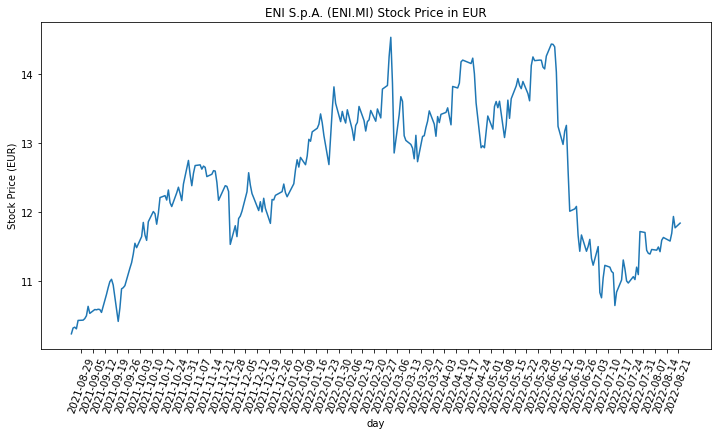

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_title("ENI S.p.A. (ENI.MI) Stock Price in EUR")
ax.set_xlabel("day")
ax.set_ylabel("Stock Price (EUR)");
ax.set_xticks(week_index)
ax.set_xticklabels(week_index, rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(eni['Close'])

## Data Selection
We want to filter the data in a DataFrame using logical constraints on the values of its columns similarly to SQL statements. For this example we use the [Primary Commodities Price System](https://data.imf.org/?sk=471DDDF8-D8A7-499A-81BA-5B332C01F8B9) dataset from the International Monetary Fund (IMF). The dataset contains the time series of the prices of all the commodities that have been exchanged in different markets. We will use the time series of one single commodity, the natural gas, exchanged in the European and the US markets to compare the prices for that commodities. The data can be downloaded from the IMF website and imported into a DataFrame.

In [20]:
imf_commodities_tmp = pd.read_csv('finance/data/IMF_Commodities_Price.csv')
imf_commodities_tmp[:3]

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
0,World,1,Agriculture,PAGRI,Index,IX,Value,98.509428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1,Agriculture,PAGRI,Index,IX,Value,NaN,99.757387,98.388718,...,127.470196,130.407202,136.114592,142.49899,150.384482,154.113522,151.708154,146.722491,136.550494,NaN
2,World,1,Agriculture,PAGRI,Percent Change over Previous Period,PC_PP_PT,Value,-3.531503,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We first select the time-series for the natural gas exchanged in the European market from the beginning of 2019 up to July 2022. The commodity code is PNGASEU and the unit code of the currency is USD since the prices are represented in US dollars per Million Metric British Thermal Unit (MMBTU). 

In [21]:
nat_gas_eu_tmp = imf_commodities_tmp[(imf_commodities_tmp['Commodity Code'] == 'PNGASEU') & (imf_commodities_tmp['Unit Code'] == 'USD')]
nat_gas_eu_tmp

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
734,World,1,"Natural gas, EU",PNGASEU,US Dollars,USD,Value,4.454858,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,World,1,"Natural gas, EU",PNGASEU,US Dollars,USD,Value,NaN,7.161065,5.986339,...,27.383826,37.363363,27.890945,26.984281,41.727688,31.989874,27.464166,32.912607,51.145913,NaN


We select the time-series of the prices for each month in the 2nd row and remove the last NaN value

In [22]:
nat_gas_eu_index = nat_gas_eu_tmp.index[1]
nat_gas_eu_months_tmp = nat_gas_eu_tmp.loc[nat_gas_eu_index][8:].dropna()

The 2nd step is to select the same data for the US market. Here the commodity code for the natural gas exchanged in the US market is PNGASUS and the unit code for the price is USD, the same as for the European market. 

In [23]:
nat_gas_us_tmp = imf_commodities_tmp[(imf_commodities_tmp['Commodity Code'] == 'PNGASUS') & (imf_commodities_tmp['Unit Code'] == 'USD')]
nat_gas_us_tmp

,Country Name,Country Code,Commodity Name,Commodity Code,Unit Name,Unit Code,Attribute,2019,2019M1,2019M2,...,2021M11,2021M12,2022M1,2022M2,2022M3,2022M4,2022M5,2022M6,2022M7,Unnamed: 53
182,World,1,"Natural Gas, US Henry Hub Gas",PNGASUS,US Dollars,USD,Value,2.528527,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,World,1,"Natural Gas, US Henry Hub Gas",PNGASUS,US Dollars,USD,Value,NaN,3.108696,2.6795,...,5.119091,3.858261,4.233333,4.475,4.971304,6.744762,8.16,7.570909,7.109048,NaN


In [24]:
nat_gas_us_index = nat_gas_us_tmp.index[1]
nat_gas_us_months_tmp = nat_gas_us_tmp.loc[nat_gas_us_index][8:].dropna()

The two Series use an index the column names but we prefer to use dates in the format YYYY-MM-DD so we create a new index (a DatetimeIndex) starting from Junary 1st 2019 and a frequency of one month till July 2022. We will use this index to create two new DataFrame, one for the European data and one for the US data.

In [25]:
start_day = pd.to_datetime('2019-01-01')
end_day = pd.to_datetime('2022-07-01')
month_index = pd.date_range(start_day, end_day, freq='MS')

The DataFrame for the European data

In [26]:
nat_gas_eu_months = pd.DataFrame(nat_gas_eu_months_tmp.values, index=month_index, columns=['Price'])
nat_gas_eu_months[:2]

,Price
2019-01-01,7.161065
2019-02-01,5.986339


The DataFrame for the US data

In [27]:
nat_gas_us_months = pd.DataFrame(nat_gas_us_months_tmp.values, index=month_index, columns=['Price'])
nat_gas_us_months[:2]

,Price
2019-01-01,3.108696
2019-02-01,2.6795


We can put togheter the two DataFrame 

In [31]:
nat_gas_eu_us = pd.DataFrame({ 'Price EU': nat_gas_eu_months['Price'], 'Price US': nat_gas_us_months['Price']}, index=month_index)
nat_gas_eu_us[:2]

,Price EU,Price US
2019-01-01,7.161065,3.108696
2019-02-01,5.986339,2.6795


Now we can plot the data the prices for natural gas in the European and US markets 

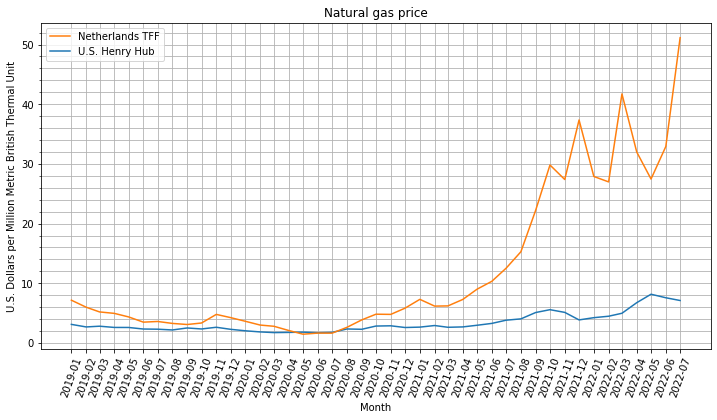

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_title("Natural gas price")
ax.set_xlabel("Month")
ax.set_ylabel("U.S. Dollars per Million Metric British Thermal Unit");
ax.set_xticks(month_index)
ax.set_xticklabels(month_index, rotation=70)
ax.set_yticks(np.arange(0, 60, 2), minor=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True, which='both')
us_plt, = plt.plot(nat_gas_eu_us['Price US'])
netherlands_plt, = plt.plot(nat_gas_eu_us['Price EU'])
plt.legend((netherlands_plt, us_plt), ['Netherlands TFF', 'U.S. Henry Hub'], loc='upper left')
#plt.savefig('natural_gas_price.png')

We can see that the prices for natural gas have increased in both markets since 2021 but much more in the European market than in the US.

### Merge
We want to merge two datasets that have one field in common. For example we want to add a field in one dataset to the other dataset. In this example we add the code of the provinces to a dataset that contains the unemployment rates of the provinces of Italy. We start by creating a DataFrame from the file that contains the list of provinces with their codes.

In [3]:
administrative_units_it = pd.read_csv('stats/data/italy/unita-amministrative-territoriali.csv')
administrative_units_it.head()

,Codice Regione,Codice UnitÃ territoriale sovracomunale,Codice Provincia,Codice Comune formato alfanumerico,Denominazione in italiano,Codice Ripartizione Geografica,Ripartizione geografica,Regione,Provincia,Tipologia di UnitÃ territoriale sovracomunale,Flag capoluogo di provincia cittÃ metropolitana,Sigla automobilistica,Codice Comune formato numerico,Codice Comune numerico con 103 province (dal 1995 al 2005),Codice Catastale del comune
0,1,201,1,1001,AgliÃ¨,1,Nord-ovest,Piemonte,Torino,3,0,TO,1001,1001,A074
1,1,201,1,1002,Airasca,1,Nord-ovest,Piemonte,Torino,3,0,TO,1002,1002,A109
2,1,201,1,1003,Ala di Stura,1,Nord-ovest,Piemonte,Torino,3,0,TO,1003,1003,A117
3,1,201,1,1004,Albiano d'Ivrea,1,Nord-ovest,Piemonte,Torino,3,0,TO,1004,1004,A157
4,1,201,1,1006,Almese,1,Nord-ovest,Piemonte,Torino,3,0,TO,1006,1006,A218


We want only the list of the name of the provinces and the code

In [4]:
provinces_tmp = administrative_units_it[['Codice Provincia', 'Provincia']].drop_duplicates()
provinces_tmp.head()

,Codice Provincia,Provincia
0,1,Torino
312,2,Vercelli
394,3,Novara
481,4,Cuneo
728,5,Asti


We create a new dataframe with the natural numbering as index and we change the name of the columns

In [6]:
provinces_tmp.sort_values(by='Provincia', inplace=True)
nat_index = pd.Series(np.arange(0, len(provinces_tmp)))
provinces = pd.DataFrame(provinces_tmp.values, columns=['COD_UTS', 'DEN_UTS'], index=nat_index)
provinces.head()

,COD_UTS,DEN_UTS
0,84,Agrigento
1,6,Alessandria
2,42,Ancona
3,7,Aosta
4,51,Arezzo


We count the number of provinces.

In [7]:
num_provinces = len(provinces)
num_provinces

107

Then we create a DataFrame from the file of the unemployment rates to which we want to add a column with the code of the provinces.

In [8]:
unemployment_rates_it_tmp = pd.read_csv('stats/data/italy/unemployment_rate_istat_province.csv')
unemployment_rates_it_tmp.sort_values(by='DEN_UTS', inplace=True)
unemployment_rates_it = pd.DataFrame(unemployment_rates_it_tmp.values, columns = unemployment_rates_it_tmp.columns, index=nat_index)
unemployment_rates_it.head()

,DEN_UTS,unemployment
0,Agrigento,21.777
1,Alessandria,6.867
2,Ancona,8.406
3,Aosta,7.26
4,Arezzo,7.051


We count the number of provinces in this dataset to see whether it is the same as in the previous one

In [9]:
num_provinces == len(unemployment_rates_it)

True

The two dataframes contain the same number of provinces but as we can see the some names are different. We will use a function to find the rows that have a different name for the same province.

In [10]:
def compare(df1, df2, column_name):
    for i in range(0, len(df1)):
        same = False
        for j in range(i, len(df1)):
            same = df1[column_name][i] == df2[column_name][j]
            if (same):    
                break
            else:
              print("Index: {0:d}\nRecord df1: {1:s}\nRecord df2: {2:s}".format(i, df1[column_name][i], df2[column_name][j]))  
              break

In [11]:
compare(provinces, unemployment_rates_it, 'DEN_UTS')

Index: 77
Record df1: Reggio Calabria
Record df2: Reggio di Calabria


We change the value of the row in the 2nd dataframe so that it is the same as the corresponding row in the 1st dataframe 

In [12]:
unemployment_rates_it.loc[77]['DEN_UTS'] = provinces.loc[77]['DEN_UTS']
unemployment_rates_it.loc[77]['DEN_UTS']

'Reggio Calabria'

Now we are ready to merge the two datasets using the field 'DEN_UTS'

In [13]:
merged_df = unemployment_rates_it.merge(provinces, left_on=['DEN_UTS'], right_on=['DEN_UTS'])
merged_df.head()

,DEN_UTS,unemployment,COD_UTS
0,Agrigento,21.777,84
1,Alessandria,6.867,6
2,Ancona,8.406,42
3,Aosta,7.26,7
4,Arezzo,7.051,51


We count the number of records in the merged dataset. It should be the same number as in the two source datasets.

In [14]:
len(merged_df)

107

Finally we can save the data as a CSV file.

In [16]:
merged_df.to_csv('stats/data/italy/unemployment_rate_istat_province_cod_den_uts.csv', index=False)